In [1]:
import os
import sys
import math
import argparse
import numpy as np
from collections import Counter

# Keras imports
from keras.models import Model
from keras import backend as K

# ML4CVD Imports
from ml4cvd.arguments import parse_args
from ml4cvd.models import make_multimodal_to_multilabel_model, train_model_from_generators
from ml4cvd.tensor_generators import TensorGenerator, big_batch_from_minibatch_generator, test_train_valid_tensor_generators

# IPython imports
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/apache_beam/__init__.py:84: UserWarning: Running the Apache Beam SDK on Python 3 is not yet fully supported. You may encounter buggy behavior or missing features.
  'Running the Apache Beam SDK on Python 3 is not yet fully supported. '


In [2]:
def gradients_from_output(args, model, output_layer, output_index):
    K.set_learning_phase(1)
    input_tensor = model.input
    x = model.get_layer(output_layer).output[:,output_index]
    grads = K.gradients(x, input_tensor)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-6) # normalization trick: we normalize the gradient
    iterate = K.function([input_tensor], [x, grads])
    return iterate

def saliency_map(input_tensor, model, output_layer, output_index):
    get_gradients = gradients_from_output(args, model, output_layer, output_index)
    activation, grads = get_gradients([input_tensor])
    print('Activation is:', activation, 'gradient shape:', grads.shape)
    return grads


In [ ]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/pix-size-tensors/2019-04-29/', 
            '--input_tensors', 'mri_slice', 
            '--output_tensors', 'end_systole_volume',
            '--batch_size', '6',
            '--epochs', '2',  
            '--learning_rate', '0.001',
            '--training_steps', '128',
            '--validation_steps', '10',
            '--test_steps', '1',
            '--model_file', '/mnt/ml4cvd/projects/jamesp/data/models/mri_slice_esv.hd5',
            '--id', 'mri_slice_esv']
args = parse_args()

generate_train, generate_valid, generate_test = test_train_valid_tensor_generators(args.tensor_maps_in,  args.tensor_maps_out,  args.tensors, args.batch_size,   args.valid_ratio, args.test_ratio, args.test_modulo, args.balance_csvs)

model = make_multimodal_to_multilabel_model(args.model_file, args.model_layers, args.model_freeze,
                                                args.tensor_maps_in, args.tensor_maps_out, args.activation,
                                                args.dense_layers, args.dropout, args.mlp_concat, args.conv_layers,
                                                args.max_pools, args.res_layers, args.dense_blocks, args.block_size,
                                                args.conv_bn, args.conv_x, args.conv_y, args.conv_z, args.conv_dropout,
                                                args.conv_width, args.u_connect, args.pool_x, args.pool_y, args.pool_z, args.padding,
                                                args.learning_rate)

test_data, test_labels, test_paths = big_batch_from_minibatch_generator(args.tensor_maps_in, args.tensor_maps_out,
                                                                        generate_test, args.test_steps)

In [ ]:
test_tensor = test_data['input_mri_slice']
print(test_tensor.shape, test_tensor[:1].shape)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(test_tensor[i, :, :, 0]) for i in range(6)]

In [ ]:
grads = saliency_map(test_tensor, model, 'output_end_systole_volume_continuous', 0)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(grads[i, :, :, 0]) for i in range(6)]

In [ ]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/pix-size-tensors/2019-04-29/', 
            '--input_tensors', 'mri_slice', 
            '--output_tensors', 'bmi',
            '--batch_size', '6',
            '--epochs', '2',  
            '--learning_rate', '0.001',
            '--training_steps', '128',
            '--validation_steps', '10',
            '--test_steps', '1',
            '--model_file', '/mnt/ml4cvd/projects/jamesp/data/models/mri_slice_bmi.hd5',
            '--id', 'mri_slice_bmi']

args = parse_args()

generate_train, generate_valid, generate_test = test_train_valid_tensor_generators(args.tensor_maps_in,  args.tensor_maps_out,  args.tensors, args.batch_size,   args.valid_ratio, args.test_ratio, args.test_modulo, args.balance_csvs)

model = make_multimodal_to_multilabel_model(args.model_file, args.model_layers, args.model_freeze,
                                                args.tensor_maps_in, args.tensor_maps_out, args.activation,
                                                args.dense_layers, args.dropout, args.mlp_concat, args.conv_layers,
                                                args.max_pools, args.res_layers, args.dense_blocks, args.block_size,
                                                args.conv_bn, args.conv_x, args.conv_y, args.conv_z, args.conv_dropout,
                                                args.conv_width, args.u_connect, args.pool_x, args.pool_y, args.pool_z, args.padding,
                                                args.learning_rate)

test_data, test_labels, test_paths = big_batch_from_minibatch_generator(args.tensor_maps_in, args.tensor_maps_out,
                                                                        generate_test, args.test_steps)

In [ ]:
test_tensor = test_data['input_mri_slice']
print(test_tensor.shape, test_tensor[:1].shape)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(test_tensor[i, :, :, 0]) for i in range(6)]

In [ ]:
grads = saliency_map(test_tensor, model, 'output_23104_Body-mass-index-BMI_0_0_continuous', 0)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(grads[i, :, :, 0]) for i in range(6)]

In [ ]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/pix-size-tensors/2019-04-29/', 
            '--input_tensors', 'mri_slice', 
            '--output_tensors', 'genetic_sex',
            '--batch_size', '6',
            '--epochs', '2',  
            '--learning_rate', '0.001',
            '--training_steps', '128',
            '--validation_steps', '10',
            '--test_steps', '1',
            '--model_file', '/mnt/ml4cvd/projects/jamesp/data/models/mri_slice_sex.hd5',
            '--id', 'mri_slice_sex']

args = parse_args()

generate_train, generate_valid, generate_test = test_train_valid_tensor_generators(args.tensor_maps_in,  args.tensor_maps_out,  args.tensors, args.batch_size,   args.valid_ratio, args.test_ratio, args.test_modulo, args.balance_csvs)

model = make_multimodal_to_multilabel_model(args.model_file, args.model_layers, args.model_freeze,
                                                args.tensor_maps_in, args.tensor_maps_out, args.activation,
                                                args.dense_layers, args.dropout, args.mlp_concat, args.conv_layers,
                                                args.max_pools, args.res_layers, args.dense_blocks, args.block_size,
                                                args.conv_bn, args.conv_x, args.conv_y, args.conv_z, args.conv_dropout,
                                                args.conv_width, args.u_connect, args.pool_x, args.pool_y, args.pool_z, args.padding,
                                                args.learning_rate)

test_data, test_labels, test_paths = big_batch_from_minibatch_generator(args.tensor_maps_in, args.tensor_maps_out,
                                                                        generate_test, args.test_steps)

In [ ]:
test_tensor = test_data['input_mri_slice']
print(test_tensor.shape, test_tensor[:1].shape)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(test_tensor[i, :, :, 0]) for i in range(6)]

In [ ]:
grads = saliency_map(test_tensor, model, 'output_genetic_sex_categorical', 0)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(grads[i, :, :, 0]) for i in range(6)]

In [ ]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/pix-size-tensors/2019-04-29/', 
            '--input_tensors', 'mri_slice', 
            '--output_tensors', 'birth_year',
            '--batch_size', '6',
            '--epochs', '2',  
            '--learning_rate', '0.001',
            '--training_steps', '128',
            '--validation_steps', '10',
            '--test_steps', '1',
            '--model_file', '/mnt/ml4cvd/projects/jamesp/data/models/mri_slice_age.hd5',
            '--id', 'mri_slice_age']

args = parse_args()

generate_train, generate_valid, generate_test = test_train_valid_tensor_generators(args.tensor_maps_in,  args.tensor_maps_out,  args.tensors, args.batch_size,   args.valid_ratio, args.test_ratio, args.test_modulo, args.balance_csvs)

model = make_multimodal_to_multilabel_model(args.model_file, args.model_layers, args.model_freeze,
                                                args.tensor_maps_in, args.tensor_maps_out, args.activation,
                                                args.dense_layers, args.dropout, args.mlp_concat, args.conv_layers,
                                                args.max_pools, args.res_layers, args.dense_blocks, args.block_size,
                                                args.conv_bn, args.conv_x, args.conv_y, args.conv_z, args.conv_dropout,
                                                args.conv_width, args.u_connect, args.pool_x, args.pool_y, args.pool_z, args.padding,
                                                args.learning_rate)

test_data, test_labels, test_paths = big_batch_from_minibatch_generator(args.tensor_maps_in, args.tensor_maps_out,
                                                                        generate_test, args.test_steps)

In [ ]:
test_tensor = test_data['input_mri_slice']
print(test_tensor.shape, test_tensor[:1].shape)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(test_tensor[i, :, :, 0]) for i in range(6)]

In [ ]:
grads = saliency_map(test_tensor, model, 'output_22200_Year-of-birth_0_0_continuous', 0)
_, axes = plt.subplots(1, 6, figsize=(18, 14))
[axes[i].imshow(grads[i, :, :, 0]) for i in range(6)]

In [ ]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/pix-size-tensors/2019-04-29/', 
            '--input_tensors', 'mri_systole_diastole', 
            '--output_tensors', 'end_systole_volume',
            '--batch_size', '6',
            '--epochs', '2',  
            '--learning_rate', '0.001',
            '--training_steps', '128',
            '--validation_steps', '10',
            '--test_steps', '1',
            '--model_file', '/mnt/ml4cvd/projects/jamesp/data/models/mri_systole_diastole_esv.hd5',
            '--id', 'mri_systole_diastole_esv']
args = parse_args()

generate_train, generate_valid, generate_test = test_train_valid_tensor_generators(args.tensor_maps_in,  args.tensor_maps_out,  args.tensors, args.batch_size,   args.valid_ratio, args.test_ratio, args.test_modulo, args.balance_csvs)

model = make_multimodal_to_multilabel_model(args.model_file, args.model_layers, args.model_freeze,
                                                args.tensor_maps_in, args.tensor_maps_out, args.activation,
                                                args.dense_layers, args.dropout, args.mlp_concat, args.conv_layers,
                                                args.max_pools, args.res_layers, args.dense_blocks, args.block_size,
                                                args.conv_bn, args.conv_x, args.conv_y, args.conv_z, args.conv_dropout,
                                                args.conv_width, args.u_connect, args.pool_x, args.pool_y, args.pool_z, args.padding,
                                                args.learning_rate)

test_data, test_labels, test_paths = big_batch_from_minibatch_generator(args.tensor_maps_in, args.tensor_maps_out,
                                                                        generate_test, args.test_steps)


In [ ]:
test_tensor = test_data['input_mri_systole_diastole']
print(test_tensor.shape, test_tensor[:1].shape)
_, axes = plt.subplots(2, 6, figsize=(18, 4), sharex=True)
for i in range(6):
    axes[0, i].set_title('Diastole')
    axes[1, i].set_title('Systole')
    axes[0, i].imshow(test_tensor[i, :, :, 0, 0])
    axes[1, i].imshow(test_tensor[i, :, :, 1, 0])
    

In [ ]:
grads = saliency_map(test_tensor, model, 'output_end_systole_volume_continuous', 0)
_, axes = plt.subplots(2, 6, figsize=(18, 4), sharex=True)
for i in range(6):
    axes[0, i].set_title('Diastole')
    axes[1, i].set_title('Systole')
    axes[0, i].imshow(grads[i, :, :, 0, 0])
    axes[1, i].imshow(grads[i, :, :, 1, 0])
    

In [4]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/ecg-rest-31k/2019-06-10/', 
            '--input_tensors', 'ecg_rest_1lead', 
            '--output_tensors', 'ecg_semi_coarse_with_poor',
            '--batch_size', '6',
            '--epochs', '2',  
            '--learning_rate', '0.001',
            '--training_steps', '128',
            '--validation_steps', '10',
            '--test_steps', '1',
            '--model_file', '/home/sam/ml/trained_models/ecg_1lead_rhythm_only/ecg_1lead_rhythm_only.hd5',
            '--id', 'ecg_1lead_rhythm_only']
args = parse_args()

generate_train, generate_valid, generate_test = test_train_valid_tensor_generators(args.tensor_maps_in,  args.tensor_maps_out,  args.tensors, args.batch_size,   args.valid_ratio, args.test_ratio, args.test_modulo, args.balance_csvs)

model = make_multimodal_to_multilabel_model(args.model_file, args.model_layers, args.model_freeze,
                                                args.tensor_maps_in, args.tensor_maps_out, args.activation,
                                                args.dense_layers, args.dropout, args.mlp_concat, args.conv_layers,
                                                args.max_pools, args.res_layers, args.dense_blocks, args.block_size,
                                                args.conv_bn, args.conv_x, args.conv_y, args.conv_z, args.conv_dropout,
                                                args.conv_width, args.u_connect, args.pool_x, args.pool_y, args.pool_z, args.padding,
                                                args.learning_rate)

test_data, test_labels, test_paths = big_batch_from_minibatch_generator(args.tensor_maps_in, args.tensor_maps_out,
                                                                        generate_test, args.test_steps)

2019-09-18 09:23:21,742 - logger:25 - INFO - Logging configuration was loaded. Log messages can be found at ./recipes_output/ecg_1lead_rhythm_only/log_2019-09-18_09-23_0.log.
2019-09-18 09:23:21,743 - arguments:187 - INFO - Command Line was:

./scripts/tf.sh train --tensors /mnt/disks/ecg-rest-31k/2019-06-10/ --input_tensors ecg_rest_1lead --output_tensors ecg_semi_coarse_with_poor --batch_size 6 --epochs 2 --learning_rate 0.001 --training_steps 128 --validation_steps 10 --test_steps 1 --model_file /home/sam/ml/trained_models/ecg_1lead_rhythm_only/ecg_1lead_rhythm_only.hd5 --id ecg_1lead_rhythm_only



2019-09-18 09:23:21,744 - arguments:188 - INFO - Total TensorMaps:4497 Arguments are Namespace(activation='relu', aligned_dimension=16, alpha=0.5, app_csv=None, b_slice_force=None, balance_csvs=[], batch_size=6, bigquery_credentials_file='/mnt/ml4cvd/projects/jamesp/bigquery/bigquery-viewer-credentials.json', bigquery_dataset='broad-ml4cvd.ukbb7089_r10data', block_size=3, categorical_fie

2019-09-18 09:23:45,818 - tensor_generators:248 - INFO - Input tensor 'input_strip_ecg_rest' has shape (6, 600, 8)
2019-09-18 09:23:45,820 - tensor_generators:251 - INFO - Output tensor 'output_ecg_semi_coarse_with_poor_categorical' has shape (6, 6)


(6, 600, 8) (1, 600, 8)


[[<matplotlib.lines.Line2D at 0x7ff2f1e06828>],

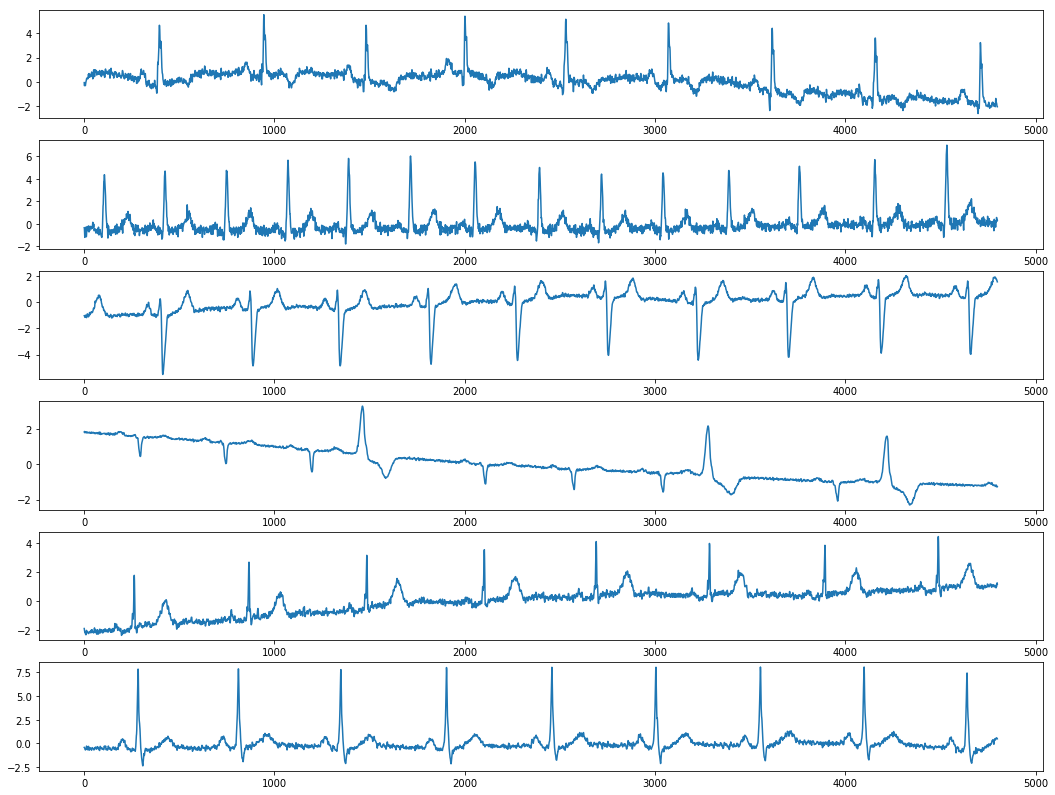

In [5]:
test_tensor = test_data['input_strip_ecg_rest']
print(test_tensor.shape, test_tensor[3:4].shape)
_, axes = plt.subplots(6, 1, figsize=(18, 14))
[axes[i].plot(test_tensor[i,:,:].flatten('F')) for i in range(6)]

Activation is: [1.8126300e-03 1.5464979e-01 5.9132159e-01 1.3323015e-01 1.6586548e-03
 1.9088775e-06] gradient shape: (6, 600, 8)


[[<matplotlib.lines.Line2D at 0x7ff2f026f4a8>],

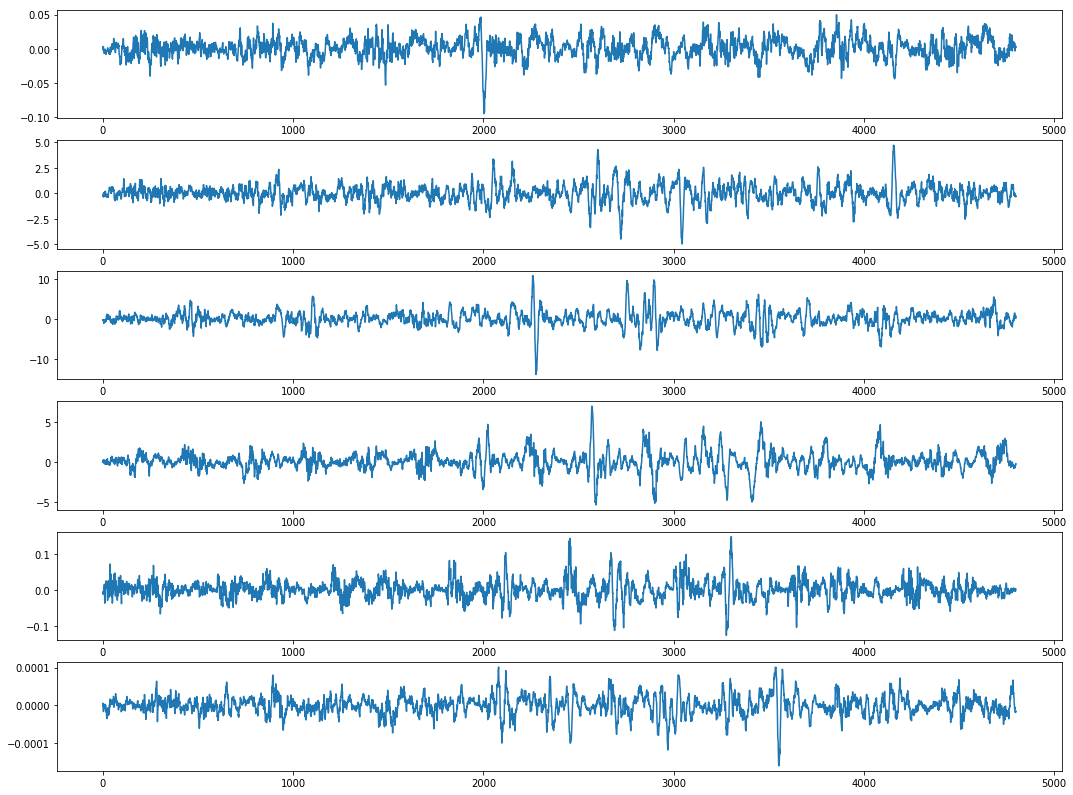

In [7]:
grads = saliency_map(test_tensor, model, 'output_ecg_semi_coarse_with_poor_categorical', 0)
_, axes = plt.subplots(6, 1, figsize=(18, 14))
[axes[i].plot(grads[i,:,:].flatten('F')) for i in range(6)]

Activation is: [1.6851468e-02 4.5182475e-01 3.2538709e-01 2.7582857e-01 1.1175710e-02
 4.9393457e-05] gradient shape: (6, 600, 8)


[[<matplotlib.lines.Line2D at 0x7ff2b4696160>],

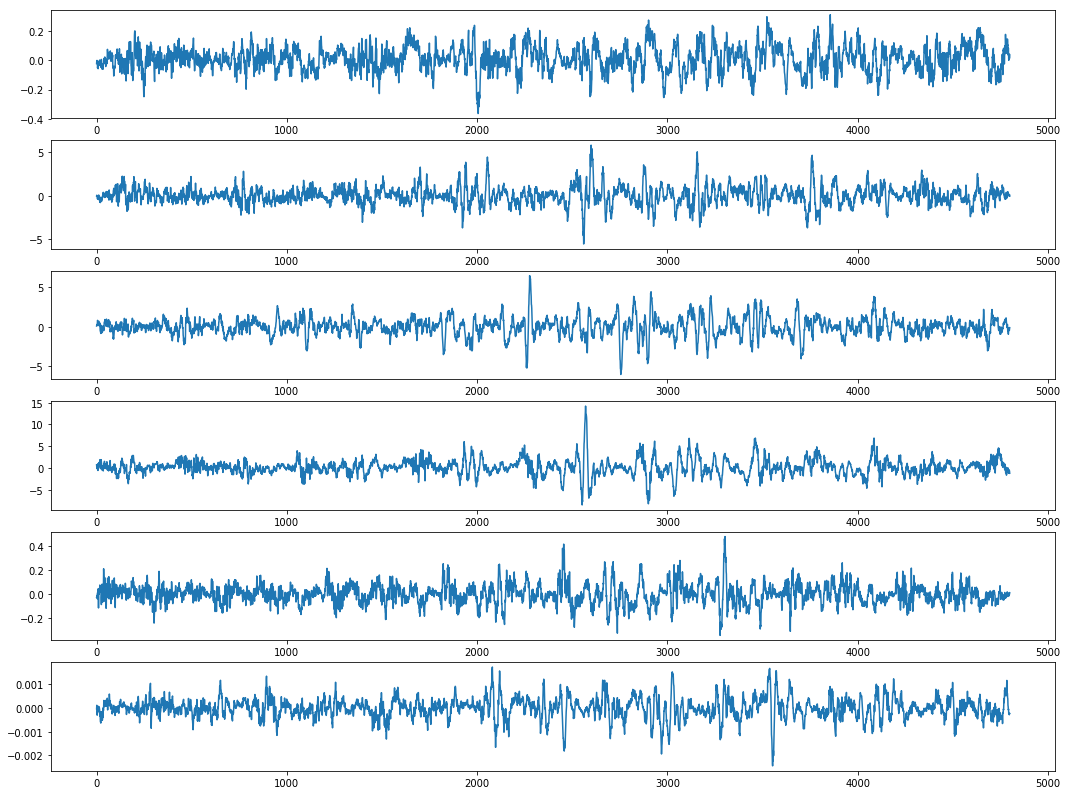

In [8]:
grads = saliency_map(test_tensor, model, 'output_ecg_semi_coarse_with_poor_categorical', 3)
_, axes = plt.subplots(6, 1, figsize=(18, 14))
[axes[i].plot(grads[i,:,:].flatten('F')) for i in range(6)]

In [9]:
xdir = '/mnt/disks/ecg-rest-31k/2019-06-10/'
paths = [xdir+'1238558.hd5', xdir+'1258475.hd5', xdir+'1286494.hd5', xdir+'1381627.hd5', 
         xdir+'1487911.hd5', xdir+'1509361.hd5', xdir+'1578315.hd5', xdir+'1616127.hd5', xdir+'1723645.hd5', ]
generator = TensorGenerator(8, args.tensor_maps_in, args.tensor_maps_out, paths, None, True)
data, labels, hd5s = next(generator)
print('predicitons are:', model.predict(data))

predicitons are: [[6.63954973e-01 6.99519962e-02 1.80957858e-02 1.41757667e-01
  4.06601056e-02 6.55794516e-02]
 [1.58465028e-01 1.20120101e-01 8.99962932e-02 1.98572680e-01
  4.17962186e-02 3.91049653e-01]
 [6.29556239e-01 6.40180474e-03 6.12582546e-03 2.36870348e-01
  5.44840656e-03 1.15597345e-01]
 [1.78551072e-05 9.93325591e-01 7.29225518e-04 4.58354922e-03
  5.84172631e-05 1.28539559e-03]
 [1.66876819e-02 7.66842842e-01 3.04268673e-02 5.64986244e-02
  5.19825472e-03 1.24345735e-01]
 [1.30709991e-01 4.33585316e-01 3.60721387e-02 1.58003092e-01
  2.64524184e-02 2.15177089e-01]
 [6.37530684e-01 2.98403502e-02 3.61533440e-03 2.12911829e-01
  6.64072577e-03 1.09461084e-01]
 [5.34494221e-01 1.45490905e-02 2.18769051e-02 2.77985185e-01
  8.85104164e-02 6.25841841e-02]]


[[<matplotlib.lines.Line2D at 0x7ff2b444fa90>],

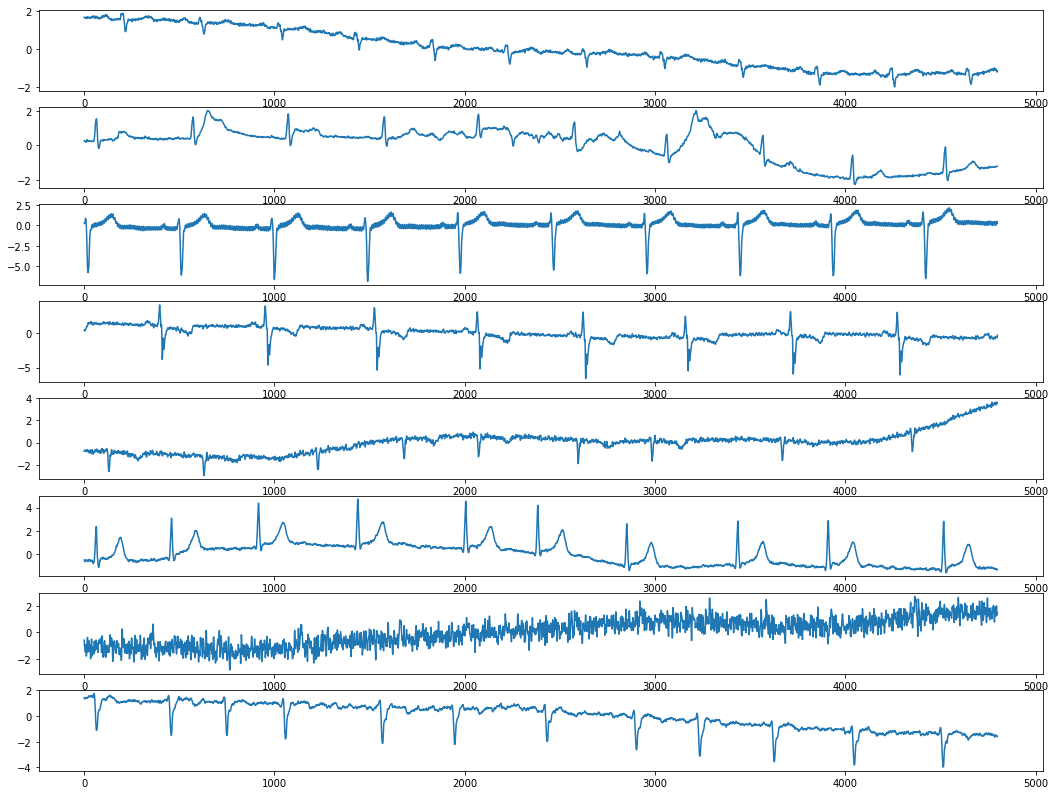

In [10]:
test_tensor = data['input_strip_ecg_rest']
_, axes = plt.subplots(8, 1, figsize=(18, 14))
[axes[i].plot(test_tensor[i,:,:].flatten('F')) for i in range(8)]

Activation is: [0.14175767 0.19857268 0.23687035 0.00458355 0.05649862 0.15800309
 0.21291183 0.2779852 ] gradient shape: (8, 600, 8)


[[<matplotlib.lines.Line2D at 0x7ff2b406c630>],

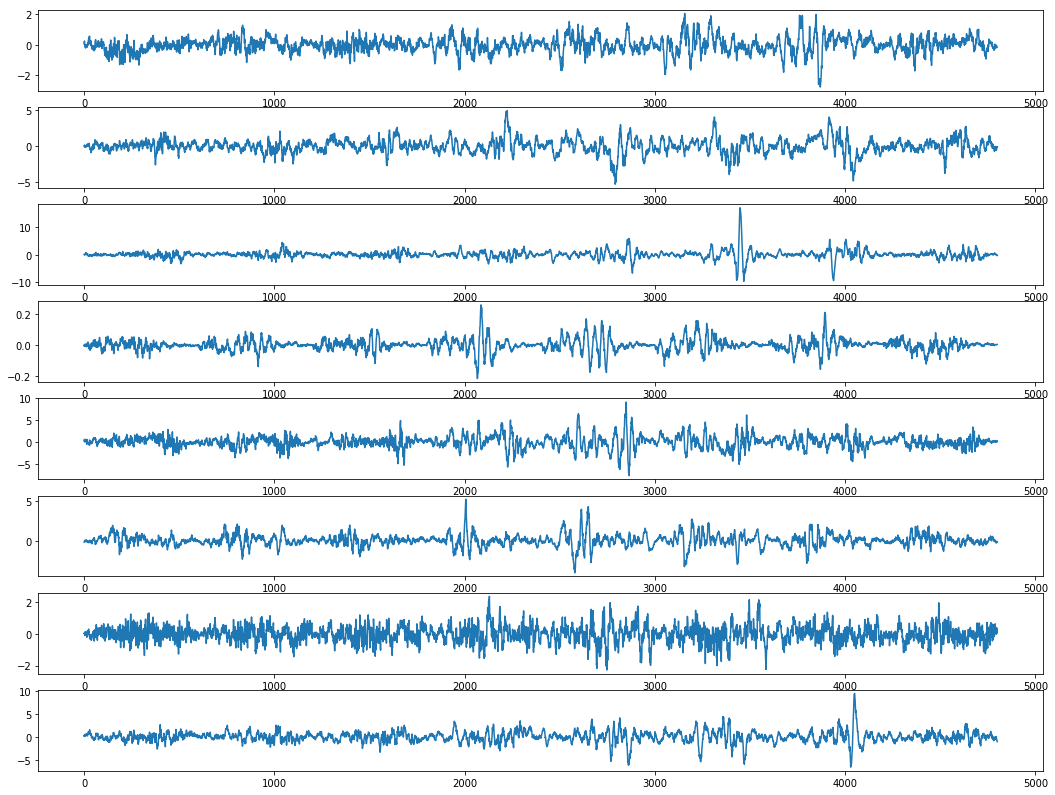

In [11]:
grads = saliency_map(test_tensor, model, 'output_ecg_semi_coarse_with_poor_categorical', 3)
_, axes = plt.subplots(8, 1, figsize=(18, 14))
[axes[i].plot(grads[i,:,:].flatten('F')) for i in range(8)]

Activation is: [6.6395497e-01 1.5846503e-01 6.2955624e-01 1.7855107e-05 1.6687682e-02
 1.3070999e-01 6.3753068e-01 5.3449422e-01] gradient shape: (8, 600, 8)


[[<matplotlib.lines.Line2D at 0x7ff0e5525278>],

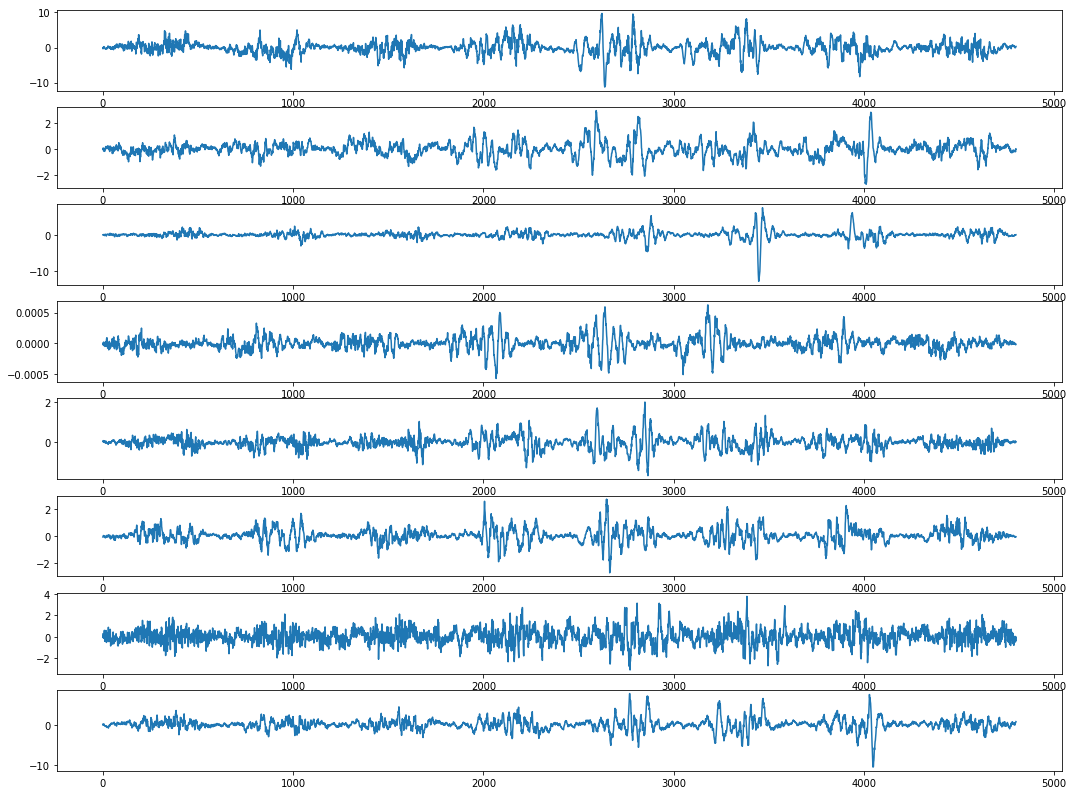

In [12]:
grads = saliency_map(test_tensor, model, 'output_ecg_semi_coarse_with_poor_categorical', 0)
_, axes = plt.subplots(8, 1, figsize=(18, 14))
[axes[i].plot(grads[i,:,:].flatten('F')) for i in range(8)]

In [13]:
grads = saliency_map(test_tensor[7:8], model, 'output_ecg_semi_coarse_with_poor_categorical', 2)

Activation is: [0.02187691] gradient shape: (1, 600, 8)


In [14]:
grads = saliency_map(test_tensor[7:8], model, 'output_ecg_semi_coarse_with_poor_categorical', 0)

Activation is: [0.5344944] gradient shape: (1, 600, 8)
